# Automating Crypto Website API Pull

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time, sleep
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x:'%.5f' % x)
crypto_data = None

### Fetch and save data

In [2]:
def fetch_api_data():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '********',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        return data
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None

In [3]:
def api_runner():
    global crypto_data
    
    try:
        data = fetch_api_data()    
        crypto_data = pd.json_normalize(data['data'])
        crypto_data['timestamp'] = pd.to_datetime('now', utc=True)
            
        if not os.path.isfile('data/crypto_api.csv'):
            crypto_data.to_csv('data/crypto_api.csv', header='column_names', index=False)
        else:
            crypto_data.to_csv('data/crypto_api.csv', mode='a', header=False, index=False)
        
    except Exception as e:
        print(f"An error occurred: {e}")

In [5]:
for i in range(333):
    api_runner()
    print("API runner completed successfully!")
    sleep(60) # sleep for 1 minute
exit()

API runner completed successfully!
API runner completed successfully!
API runner completed successfully!
API runner completed successfully!


KeyboardInterrupt: 

### Read in the data

In [7]:
crypto_data = pd.read_csv('data/crypto_api.csv')
crypto_data

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11776,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19768578.00000,19768578.00000,False,NaN,1,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,67626.86573,40117844021.80666,-17.72440,-0.12399,1.79244,11.96168,17.36949,13.80859,6.01566,1336886970057.28589,57.48630,1420164180306.89990,NaN,2024-10-16T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 21:04:21.788502+00:00
1,1027,Ethereum,ETH,ethereum,9424,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120386200.15205,120386200.15205,True,NaN,2,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,2619.02212,17615837374.07010,-20.70020,0.13582,1.92412,11.23657,15.29313,0.10257,-23.26993,315294121636.79865,13.56760,315294121636.79999,NaN,2024-10-16T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 21:04:21.788502+00:00
2,825,Tether USDt,USDT,tether,100426,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119972176281.55080,121362937383.07552,True,NaN,3,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,0.99975,65550144110.65049,-22.24580,-0.02309,-0.00430,0.03882,-0.03346,-0.04452,-0.01684,119942148552.39989,5.15750,121332561561.57001,NaN,2024-10-16T21:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-16 21:04:21.788502+00:00
3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145931736.43191,145931736.43191,False,NaN,4,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,602.55058,1927930826.60936,-5.07490,0.20702,2.44240,6.24080,13.83879,10.71864,5.67449,87931251784.14293,3.78380,87931251784.14000,NaN,2024-10-16T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 21:04:21.788502+00:00
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469856649.49394,586718035.44898,True,NaN,5,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,154.45792,2478307649.26191,-27.94340,0.00797,1.13150,11.25933,18.70700,9.48098,-2.19836,72573081380.64784,3.12060,90623248133.22000,NaN,2024-10-16T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 21:04:21.788502+00:00
5,3408,USDC,USDC,usd-coin,22496,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34788146141.45003,34788146141.45003,False,NaN,6,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,0.99986,6928597424.61643,-16.47020,-0.02011,0.00246,-0.02172,-0.02810,-0.01618,-0.02453,34783134535.51669,1.49680,34783134535.52000,NaN,2024-10-16T21:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-16 21:04:21.788502+00:00
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,0.55034,1072324038.18052,-17.88160,-0.42062,2.37112,5.29947,-5.32187,-2.87184,-2.87496,31174054260.26378,1.34050,55034022828.16000,NaN,2024-10-16T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 21:04:21.788502+00:00
7,74,Dogecoin,DOGE,dogecoin,1081,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146394746383.70520,146394746383.70520,True,NaN,8,NaN,NaN,NaN,2024-10-16T21:02:00.000Z,0.12839,2249136338.36605,67.51670,0.77512,13.77184,20.67948,30.30100,24.76823,8.13701,18794995593.70545,0.80820,18794995593.71000,NaN,20

### Analysis

In [13]:
df = crypto_data.groupby('name', sort=False).mean().iloc[:, 14:20]
df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16566,1.73880,11.80421,17.17821,13.81510,6.05486
Ethereum,0.10470,1.86207,11.02786,15.10180,0.13075,-23.24737
Tether USDt,-0.01487,-0.00267,0.04756,-0.01639,-0.03966,-0.01586
BNB,0.22037,2.48240,6.23916,13.88554,10.58786,5.71566
Solana,0.04318,1.18534,11.24566,18.64205,9.50455,-2.10702
USDC,-0.00755,0.00033,-0.01443,-0.01187,-0.00826,-0.02067
XRP,-0.40283,2.37518,5.33327,-5.37956,-2.88327,-2.83292
Dogecoin,0.62909,13.71191,20.51840,30.15056,24.65126,8.09850
TRON,0.06205,0.93820,-0.17584,7.65029,18.10834,18.98976


In [14]:
df2 = df.stack()  # becomes a series
df2

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.16566
              quote.USD.percent_change_24h     1.73880
              quote.USD.percent_change_7d     11.80421
              quote.USD.percent_change_30d    17.17821
              quote.USD.percent_change_60d    13.81510
              quote.USD.percent_change_90d     6.05486
Ethereum      quote.USD.percent_change_1h      0.10470
              quote.USD.percent_change_24h     1.86207
              quote.USD.percent_change_7d     11.02786
              quote.USD.percent_change_30d    15.10180
              quote.USD.percent_change_60d     0.13075
              quote.USD.percent_change_90d   -23.24737
Tether USDt   quote.USD.percent_change_1h     -0.01487
              quote.USD.percent_change_24h    -0.00267
              quote.USD.percent_change_7d      0.04756
              quote.USD.percent_change_30d    -0.01639
              quote.USD.percent_change_60d    -0.03966
              quote.US

In [15]:
df3 = df2.to_frame(name='values')
df3

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.16566
             quote.USD.percent_change_24h   1.73880
             quote.USD.percent_change_7d   11.80421
             quote.USD.percent_change_30d  17.17821
             quote.USD.percent_change_60d  13.81510
             quote.USD.percent_change_90d   6.05486
Ethereum     quote.USD.percent_change_1h    0.10470
             quote.USD.percent_change_24h   1.86207
             quote.USD.percent_change_7d   11.02786
             quote.USD.percent_change_30d  15.10180
             quote.USD.percent_change_60d   0.13075
             quote.USD.percent_change_90d -23.24737
Tether USDt  quote.USD.percent_change_1h   -0.01487
             quote.USD.percent_change_24h  -0.00267
             quote.USD.percent_change_7d    0.04756
             quote.USD.percent_change_30d  -0.01639
             quote.USD.percent_change_60d  -0.03966
             quote.USD.percent_change_90d  -0.01586
BNB          quote.USD.percent_change_1h    0.22037
             quote.USD.percent_change_24h   2.48240
             quote.USD.percent_change_7d    6.23916
             quote.USD.percent_change_30d  13.88554
             quote.USD.percent_change_60d  10.58786
             quote.USD.percent_change_90d   5.71566
Solana       quote.USD.percent_change_1h    0.04318
             quote.USD.percent_change_24h   1.18534
             quote.USD.percent_change_7d   11.24566
             quote.USD.percent_change_30d  18.64205
             quote.USD.percent_change_60d   9.50455
             quote.USD.percent_change_90d  -2.10702
USDC         quote.USD.percent_change_1h   -0.00755
             quote.USD.percent_change_24h   0.00033
             quote.USD.percent_change_7d   -0.01443
             quote.USD.percent_change_30d  -0.01187
             quote.USD.percent_change_60d  -0.00826
             quote.USD.percent_change_90d  -0.02067
XRP          quote.USD.percent_change_1h   -0.40283
             quote.USD.percent_change_24h   2.37518
             quote.USD.percent_change_7d    5.33327
             quote.USD.percent_change_30d  -5.37956
             quote.USD.percent_change_60d  -2.88327
             quote.USD.percent_change_90d  -2.83292
Dogecoin     quote.USD.percent_change_1h    0.62909
             quote.USD.percent_change_24h  13.71191
             quote.USD.percent_change_7d   20.51840
             quote.USD.percent_change_30d  30.15056
             quote.USD.percent_change_60d  24.65126
             quote.USD.percent_change_90d   8.09850
TRON         quote.USD.percent_change_1h    0.06205
             quote.USD.percent_change_24h   0.93820
             quote.USD.percent_change_7d   -0.17584
             quote.USD.percent_change_30d   7.65029
             quote.USD.percent_change_60d  18.10834
             quote.USD.percent_change_90d  18.98976
Toncoin      quote.USD.percent_change_1h    0.07607
             quote.USD.percent_change_24h   1.79280
             quote.USD.percent_change_7d    4.53195
             quote.USD.percent_change_30d  -3.46421
             quote.USD.percent_change_60d -18.97205
             quote.USD.percent_change_90d -27.57356
Cardano      quote.USD.percent_change_1h    0.37049
             quote.USD.percent_change_24h   0.81611
             quote.USD.percent_change_7d    6.05304
             quote.USD.percent_change_30d   8.36479
             quote.USD.percent_change_60d   6.06161
             quote.USD.percent_change_90d -15.94011
Avalanche    quote.USD.percent_change_1h    1.07358
             quote.USD.percent_change_24h   0.46607
             quote.USD.percent_change_7d    8.41030
             quote.USD.percent_change_30d  19.43454
             quote.USD.percent_change_60d  35.89325
             quote.USD.percent_change_90d   2.98400
Shiba Inu    quote.USD.percent_change_1h    0.04220
             quote.USD.percent_change_24h   5.73536
             quote.USD.percent_change_7d   11.84269
             quote.USD.percent_change_30d

In [21]:
# create index
# index = pd.Index(range(df3.count()))
df4 = df3.reset_index()
df4 = df4.rename(columns={'level_1': 'percent_change'})
df4['percent_change'] = df4['percent_change'].replace([
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'], 
    ['1h', '24h', '7d', '30d', '60d', '90d'])
df4

,name,percent_change,values
0,Bitcoin,1h,-0.16566
1,Bitcoin,24h,1.73880
2,Bitcoin,7d,11.80421
3,Bitcoin,30d,17.17821
4,Bitcoin,60d,13.81510
5,Bitcoin,90d,6.05486
6,Ethereum,1h,0.10470
7,Ethereum,24h,1.86207
8,Ethereum,7d,11.02786
9,Ethereum,30d,15.10180


### Visualization

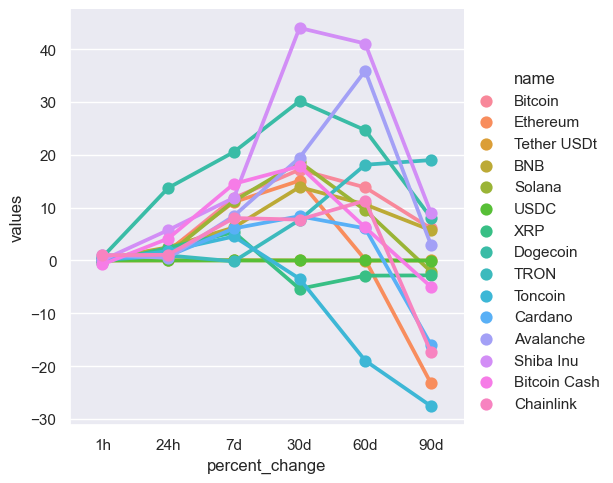

In [43]:
sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point');  # semicolon to suppress auto-display in Jupyter
plt.show()

In [39]:
df5 = crypto_data[['name', 'quote.USD.price', 'timestamp']]
df5 = df5.query("name == 'Bitcoin'")
df5['timestamp'] = pd.to_datetime(df5['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
df5

,name,quote.USD.price,timestamp
0,Bitcoin,67626.86573,2024-10-16 21:04:21
15,Bitcoin,67648.20292,2024-10-16 21:05:22
30,Bitcoin,67634.49274,2024-10-16 21:06:22
45,Bitcoin,67627.52241,2024-10-16 21:07:22


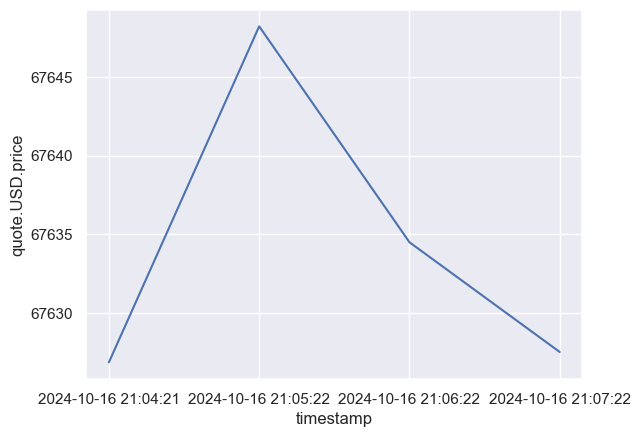

In [40]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df5)
plt.show()